In [2]:
import display
import hopfield_net
import read_csv

In [3]:
CONST_ACTIVATION_FUNCTIONS = ['signum', 'heavy_side']
CONST_DYNAMICS_TYPE = ['asynchronous', 'synchronous']

In [4]:
datasets = ["animals-14x9.csv",
                "large-25x25.csv",
                "large-25x50.csv",
                "letters-14x20.csv",
                "letters-abc-8x12.csv",
                "OCRA-12x30-cut.csv",
                "small-7x7.csv"]

In [5]:
train, dims = read_csv.read_patterns('./../data/hopfield/' + datasets[5])
num_of_patterns = train.shape[0]

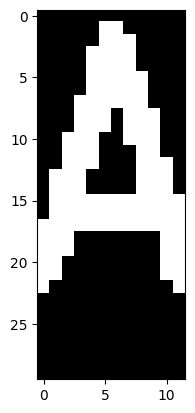

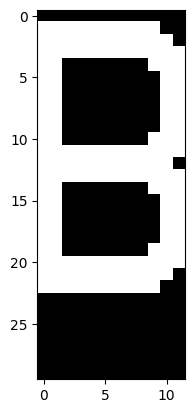

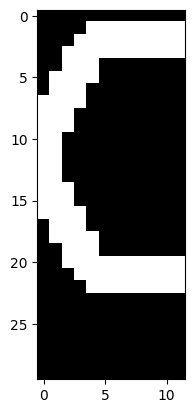

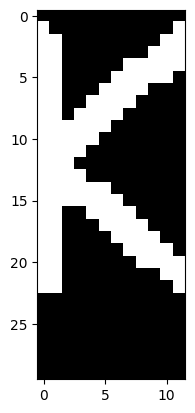

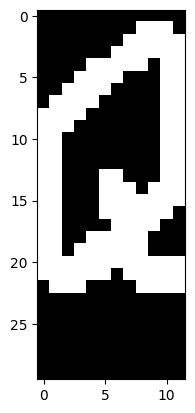

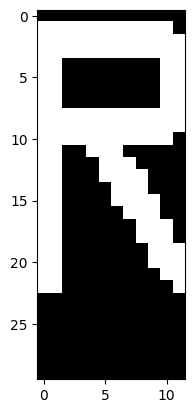

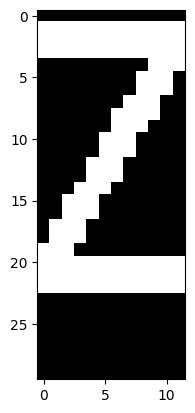

In [6]:
# save training data as .png
for i in range(num_of_patterns):
    display.save_img(train[i], dims, "./../data/hopfield/train/p" + str(i+1) + ".png")

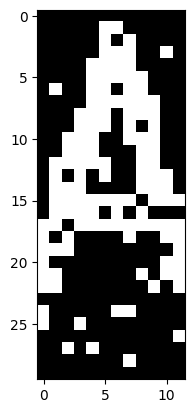

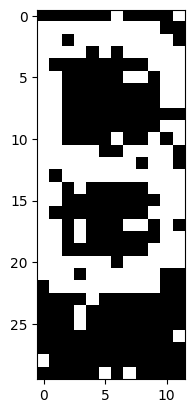

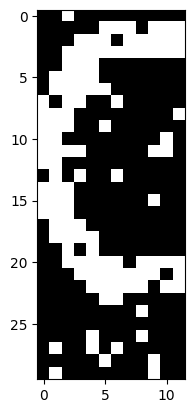

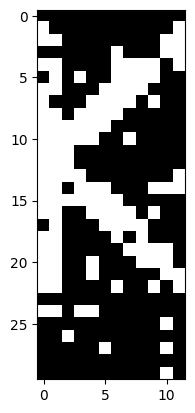

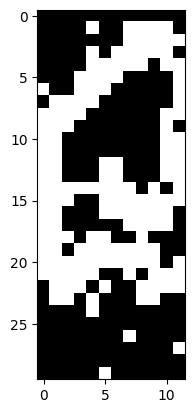

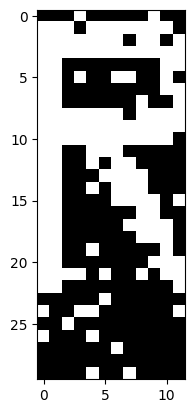

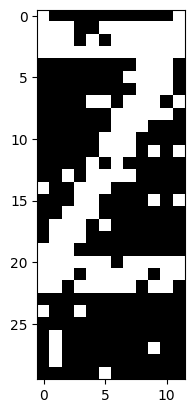

In [15]:
X = []
for i in range(num_of_patterns):
    X.append(read_csv.noise(train[i], 0.1))
    display.save_img(X[-1], dims, "./../data/hopfield/noise/n" + str(i+1) + ".png")

In [16]:
n = dims[0] * dims[1]
# activation function 0 - signum, 1 - heaviside
activation = 0
# dynamics type 0 - asynchronous, 1 - synchronous
dynamics = 0

In [17]:
HN = hopfield_net.HopfieldNet(
        n = n,
        activation = CONST_ACTIVATION_FUNCTIONS[activation],
        dynamics = CONST_DYNAMICS_TYPE[dynamics]
    )

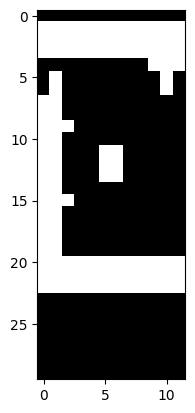

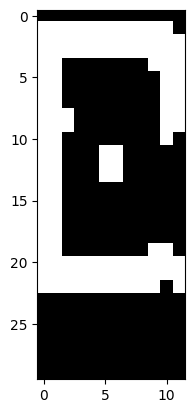

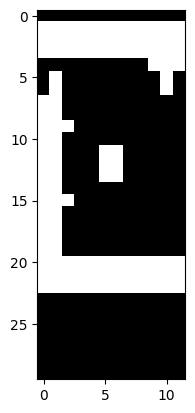

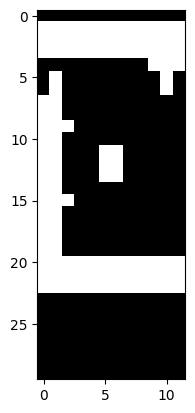

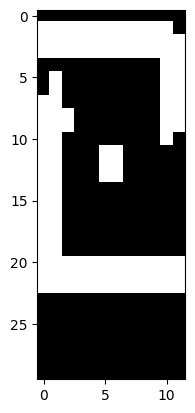

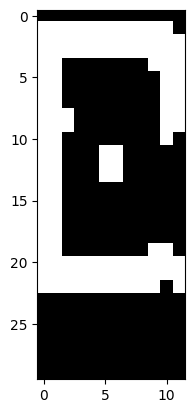

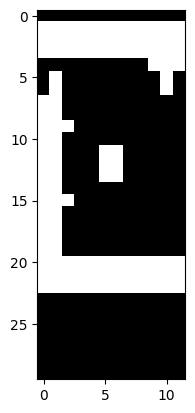

In [20]:
HN.HEBB_training(train)
for i in range(num_of_patterns):
    last_x = HN.forward(dims, init_x = X[i], epochs = 200, animation = False)
    display.save_img(last_x, dims, "./../data/hopfield/hebb/h" + str(i+1) + ".png")

In [21]:
HN2 = hopfield_net.HopfieldNet(
    n = n,
    activation = CONST_ACTIVATION_FUNCTIONS[activation],
    dynamics = CONST_DYNAMICS_TYPE[dynamics]
)


7
Oja epoch # 1
row:  [1.0285519 1.0311829 1.0339752 1.036929  1.0400403 0.       ]
Oja epoch # 2
row:  [0.33848357 0.35815406 0.37804353 0.3981517  0.41847593 0.        ]
Oja epoch # 3
row:  [0.24278067 0.25918323 0.27606013 0.293428   0.31130135 0.        ]
Oja epoch # 4
row:  [0.2012791  0.21602544 0.23133202 0.24722634 0.26373467 0.        ]
Oja epoch # 5
row:  [0.17762445 0.19140193 0.20578457 0.2208073  0.23650444 0.        ]
Oja epoch # 6
row:  [0.16222501 0.17538358 0.1891772  0.20364623 0.21883112 0.        ]
Oja epoch # 7
row:  [0.15137085 0.16411236 0.17751172 0.19161367 0.2064635  0.        ]
Oja epoch # 8
row:  [0.14330462 0.15575558 0.16888335 0.18273623 0.19736353 0.        ]
Oja epoch # 9
row:  [0.13707955 0.14932412 0.162262   0.17594452 0.19042438 0.        ]
Oja epoch # 10
row:  [0.1321378  0.14423437 0.15703905 0.17060578 0.18499018 0.        ]
Oja epoch # 11
row:  [0.12812808 0.14011852 0.15283056 0.16632043 0.18064627 0.        ]
Oja epoch # 12
row:  [0.12481757 0

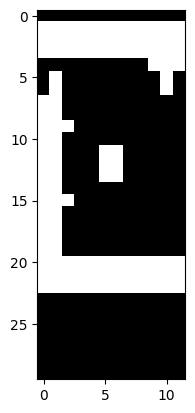

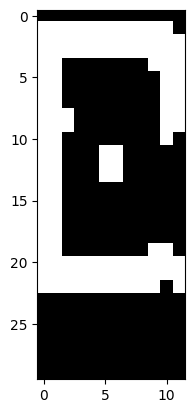

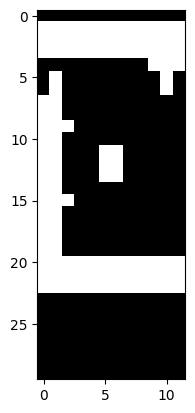

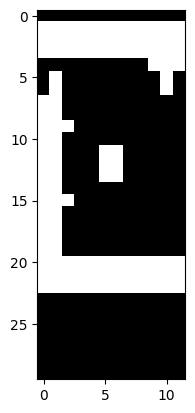

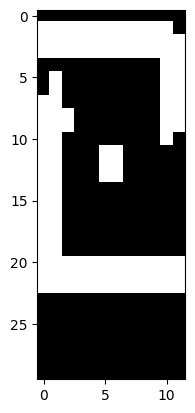

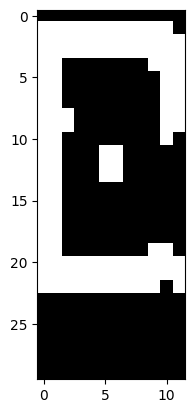

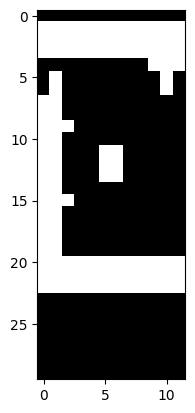

In [23]:
HN2.OJA_training(train, 30)
for i in range(num_of_patterns):
    #wait = input()
    last_x = HN.forward(dims, init_x = X[i], epochs = 100, animation = False)
    display.save_img(last_x, dims, "./../data/hopfield/oja/o" + str(i+1) + ".png")
    #wait = input()
    #last_x = HN.forward(dims, init_x = last_x, epochs = 10, animation = False)
    #display.save_img(last_x, dims, "../test/oja/o" + str(i+1) + ".png")